In [96]:
from __future__ import division

In [164]:
%matplotlib inline
%autoreload 2

In [98]:
import matplotlib.pyplot as plt 

In [99]:
import sys
sys.path.append("../")

In [321]:
import get_gal_centroids as get_gal
from test_peak_methods import draw_gaussian
from plot_gal_prop import plot_cf_contour
import compare_peak_methods as compare
from compare_peak_methods import one_big_gaussian_one_small_gaussian as \
    bimodal_gaussian

In [101]:
from get_gal_centroids import shrinking_apert 

# compare the confidence regions of different methods

In [127]:
bootNo = 100
data_size = 500

## confidence region of shrinking aperture

In [348]:
gauss_data, shrink_peak_dens, KDE_peak_dens, cent_peak_dens = \
    compare.call_gaussian_and_prepare_data(data_size=data_size, bootNo=bootNo)

##  Combined all the confidence regions

saving figure to../../paper/figures/drafts/gauss500.pdf


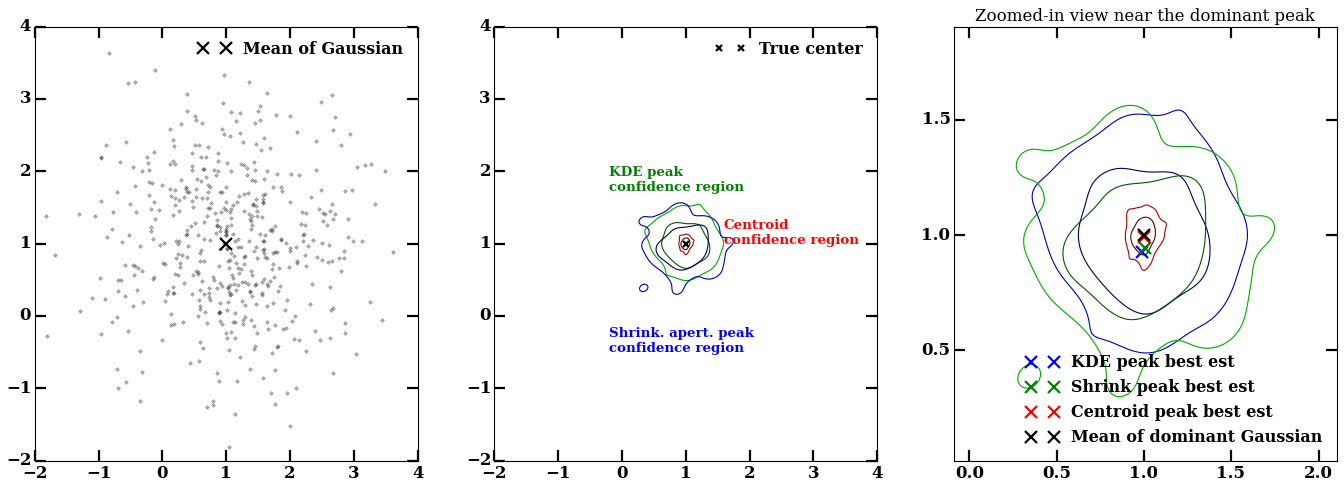

In [374]:
compare.plot_gauss_500_comparison(gauss_data, shrink_peak_dens, KDE_peak_dens,
                                  cent_peak_dens)

# Test 2 - one big gaussian, one small close by gaussian

In [ ]:
bimodal_data, shrink_peak1, KDE_peak_dens1, cent_peak_dens1 = \
    compare.call_one_big_one_small_gaussian()

saving figure to../../paper/figures/drafts/confidence_regions_bimodal_500.pdf


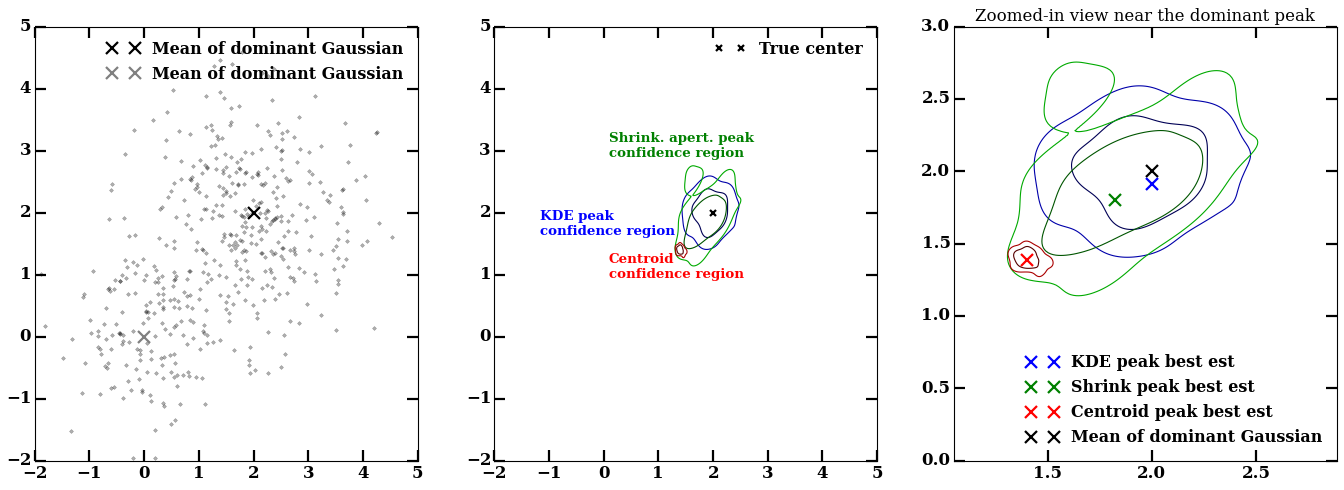

In [384]:
compare.plot_one_big_one_small_gaussian_500(
    bimodal_data, shrink_peak1, KDE_peak_dens1, cent_peak_dens1)

# draw dumbbell data and get estimates from different methods

In [339]:
dumb_data, shrink_peak_dens2, KDE_peak_dens2, KDE_peak_dens2b, cent_peak_dens2 = \
    compare.call_dumbbell_example_and_prepare_data(data_size=500, bootNo=200)

## combined contours of all methods

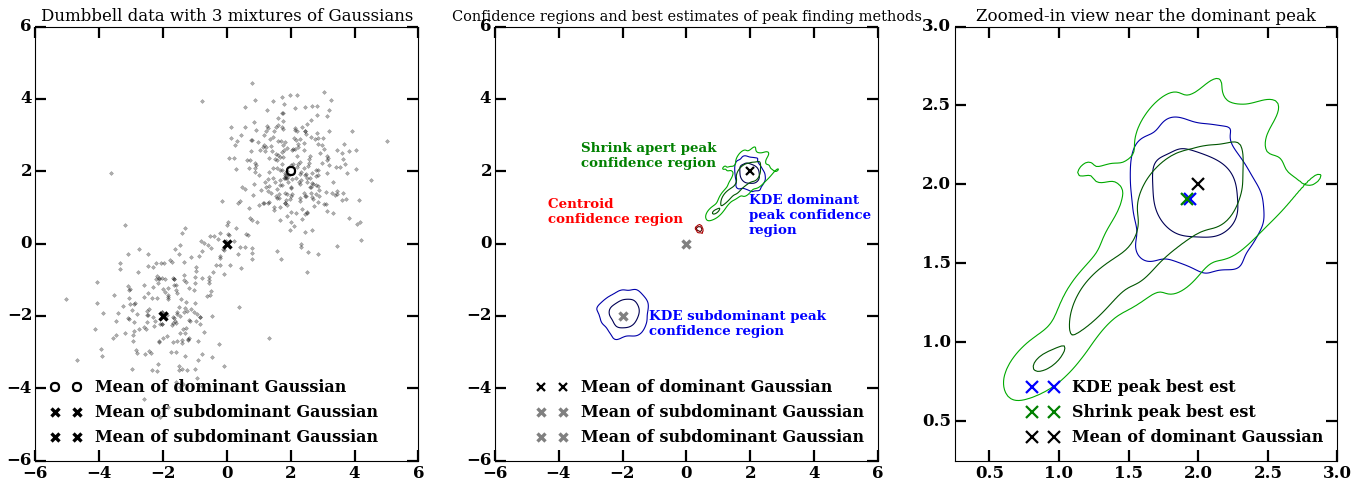

In [347]:
compare.plot_dumbbell_500_comparison(
    dumb_data, shrink_peak_dens2, KDE_peak_dens2, 
    KDE_peak_dens2b, cent_peak_dens2,
    plot_path="../../paper/figures/drafts/",
    plot_fig_name="confidence_regions_dumbbell_500.pdf")

If you want to see the source code of `compare.plot_dumbbell_500_comparison` execute the following line
```
%psource compare.plot_dumbbell_500_comparison
```